# Initialize Folders

In [1]:
from __future__ import print_function
from imutils import paths
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import keras

from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import backend as keras

from datetime import datetime

from UnetModel import *
#import skimage.io as io
#import skimage.transform as trans

#K.set_image_data_format("channels_last")

%matplotlib inline
%load_ext autoreload
%autoreload 2


Using TensorFlow backend.


In [4]:
img_rows = 256
img_cols = 256

#Training data generation
data_gen_args = dict(
#    samplewise_center = True,
#    samplewise_std_normalization = True,
    rotation_range=180,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest')

#Validation data generation
data_val_gen_args = dict(
    #samplewise_center = True,
    #samplewise_std_normalization = True
    )

#Create UNet Model
#model = FullUnetModel()
#model = UnetModel()
model = BiggerLeakyUnetModel()

#Setup generator
batch_size = 2
      
myGene = trainGenerator(batch_size,'data/train','images','masks',data_gen_args, target_size= (img_rows,img_rows))
myValGene = validationGenerator(batch_size,'data/val','images','masks',data_val_gen_args, target_size= (img_rows,img_rows))

#Create folder for models
date_object = datetime.now()
# convert object to the format we want
formatted_date = date_object.strftime('%Y%m%d')
output_dir = 'unet/{}'.format(formatted_date)
os.makedirs(output_dir, exist_ok =True)

#Setup Checkpoint to only capture best estimate
model_checkpoint = ModelCheckpoint('{}/unet_lesion_0510_{{epoch:03d}}-{{val_jaccard_coef:.5f}}.hdf5'.format(output_dir)
                                   , monitor='val_jaccard_coef'
                                   ,verbose=1, mode='max', save_best_only=True)


In [ ]:
iterations = 100
#Train
history = model.fit_generator(
    myGene,
    steps_per_epoch = 1000, 
    epochs=iterations,
    callbacks=[model_checkpoint],
    validation_data=myValGene,
    validation_steps=260)

model.save(os.path.join(output_dir, 'iter_{}'.format(iterations)))

Epoch 1/100
Found 519 images belonging to 1 classes.
Found 1555 images belonging to 1 classes.
Found 519 images belonging to 1 classes.
Found 1555 images belonging to 1 classes.
1000/1000 [==============================] - 644s 644ms/step - loss: 0.3713 - jaccard_coef: 0.4775 - val_loss: 0.0754 - val_jaccard_coef: 0.6230

Epoch 00001: val_jaccard_coef improved from -inf to 0.62302, saving model to unet/20190510/unet_lesion_0510_01-0.62.hdf5
Epoch 2/100
1000/1000 [==============================] - 621s 621ms/step - loss: 0.0881 - jaccard_coef: 0.6246 - val_loss: 0.0716 - val_jaccard_coef: 0.6469

Epoch 00002: val_jaccard_coef improved from 0.62302 to 0.64694, saving model to unet/20190510/unet_lesion_0510_02-0.65.hdf5
Epoch 3/100
1000/1000 [==============================] - 644s 644ms/step - loss: 0.0664 - jaccard_coef: 0.6514 - val_loss: 0.0427 - val_jaccard_coef: 0.6968

Epoch 00003: val_jaccard_coef improved from 0.64694 to 0.69681, saving model to unet/20190510/unet_lesion_0510_03-0

1000/1000 [==============================] - 627s 627ms/step - loss: 9.9656 - jaccard_coef: 6.9998e-05 - val_loss: 9.9781 - val_jaccard_coef: 6.9377e-05

Epoch 00036: val_jaccard_coef did not improve from 0.72659
Epoch 37/100
1000/1000 [==============================] - 628s 628ms/step - loss: 9.9561 - jaccard_coef: 7.2115e-05 - val_loss: 9.9527 - val_jaccard_coef: 7.2577e-05

Epoch 00037: val_jaccard_coef did not improve from 0.72659
Epoch 38/100
1000/1000 [==============================] - 621s 621ms/step - loss: 9.9962 - jaccard_coef: 6.3666e-05 - val_loss: 9.9819 - val_jaccard_coef: 6.2959e-05

Epoch 00038: val_jaccard_coef did not improve from 0.72659
Epoch 39/100
1000/1000 [==============================] - 622s 622ms/step - loss: 9.9465 - jaccard_coef: 7.1757e-05 - val_loss: 9.9731 - val_jaccard_coef: 6.5803e-05

Epoch 00039: val_jaccard_coef did not improve from 0.72659
Epoch 40/100
1000/1000 [==============================] - 621s 621ms/step - loss: 9.9760 - jaccard_coef: 6.79

In [15]:
#Continue traing
#Use initial_epoch 

history2 = model.fit_generator(
    myGene,
    steps_per_epoch = 1000, 
    epochs=200,
    callbacks=[model_checkpoint,tensorBoard], 
    initial_epoch = 100,
    validation_data=myValGene,
    validation_steps=100)

Epoch 101/200
1000/1000 [==============================] - 693s 693ms/step - loss: -0.8103 - jaccard_coef: 0.8103 - val_loss: -0.8042 - val_jaccard_coef: 0.8042

Epoch 00101: loss did not improve from -0.81839
Epoch 102/200
1000/1000 [==============================] - 656s 656ms/step - loss: -0.8216 - jaccard_coef: 0.8216 - val_loss: -0.8237 - val_jaccard_coef: 0.8237

Epoch 00102: loss improved from -0.81839 to -0.82154, saving model to unet_lesion.hdf5
Epoch 103/200
1000/1000 [==============================] - 644s 644ms/step - loss: -0.8222 - jaccard_coef: 0.8222 - val_loss: -0.8001 - val_jaccard_coef: 0.8001

Epoch 00103: loss improved from -0.82154 to -0.82222, saving model to unet_lesion.hdf5
Epoch 104/200
1000/1000 [==============================] - 658s 658ms/step - loss: -0.8081 - jaccard_coef: 0.8081 - val_loss: -0.8213 - val_jaccard_coef: 0.8213

Epoch 00104: loss did not improve from -0.82222
Epoch 105/200
1000/1000 [==============================] - 648s 648ms/step - loss:

1000/1000 [==============================] - 632s 632ms/step - loss: -0.8259 - jaccard_coef: 0.8259 - val_loss: -0.8135 - val_jaccard_coef: 0.8135

Epoch 00139: loss did not improve from -0.82703
Epoch 140/200
1000/1000 [==============================] - 610s 610ms/step - loss: -0.8183 - jaccard_coef: 0.8183 - val_loss: -0.7956 - val_jaccard_coef: 0.7956

Epoch 00140: loss did not improve from -0.82703
Epoch 141/200
1000/1000 [==============================] - 624s 624ms/step - loss: -0.8272 - jaccard_coef: 0.8272 - val_loss: -0.8358 - val_jaccard_coef: 0.8358

Epoch 00141: loss improved from -0.82703 to -0.82707, saving model to unet_lesion.hdf5
Epoch 142/200
1000/1000 [==============================] - 610s 610ms/step - loss: -0.8242 - jaccard_coef: 0.8242 - val_loss: -0.8228 - val_jaccard_coef: 0.8228

Epoch 00142: loss did not improve from -0.82707
Epoch 143/200
1000/1000 [==============================] - 623s 623ms/step - loss: -0.8231 - jaccard_coef: 0.8231 - val_loss: -0.7934 -

Epoch 177/200
1000/1000 [==============================] - 608s 608ms/step - loss: -0.8308 - jaccard_coef: 0.8308 - val_loss: -0.8122 - val_jaccard_coef: 0.8122

Epoch 00177: loss did not improve from -0.83482
Epoch 178/200
1000/1000 [==============================] - 609s 609ms/step - loss: -0.8347 - jaccard_coef: 0.8347 - val_loss: -0.8028 - val_jaccard_coef: 0.8028

Epoch 00178: loss did not improve from -0.83482
Epoch 179/200
1000/1000 [==============================] - 605s 605ms/step - loss: -0.8325 - jaccard_coef: 0.8325 - val_loss: -0.8388 - val_jaccard_coef: 0.8388

Epoch 00179: loss did not improve from -0.83482
Epoch 180/200
1000/1000 [==============================] - 601s 601ms/step - loss: -0.8268 - jaccard_coef: 0.8268 - val_loss: -0.7894 - val_jaccard_coef: 0.7894

Epoch 00180: loss did not improve from -0.83482
Epoch 181/200
1000/1000 [==============================] - 617s 617ms/step - loss: -0.8392 - jaccard_coef: 0.8392 - val_loss: -0.8006 - val_jaccard_coef: 0.8006

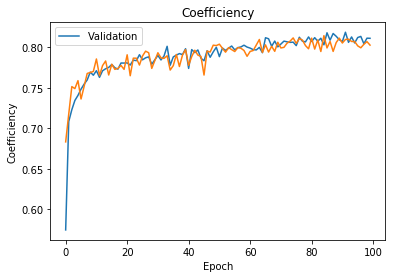

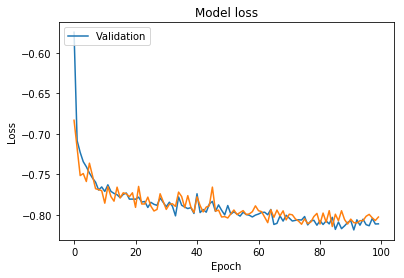

In [4]:
# Plot training & validation accuracy values
plt.plot(history.history['jaccard_coef'])
plt.plot(history.history['val_jaccard_coef'])
plt.title('Coefficiency')
plt.ylabel('Coefficiency')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [16]:
model.save('unet_lesion_20190510_rgb_256_200_epochs.hdf5')

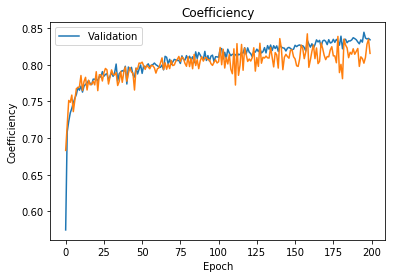

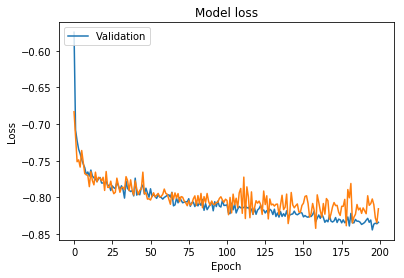

Training co-effiency    : 0.8444854245372508;
Validation co-effiency : 0.802229850590229


In [17]:
#This code combined 2 seperate training history together and plot the result
hist = {}
for i in history.history.keys():
    hist_concate = np.array([np.array(history.history[i]), np.array(history2.history[i])]).flatten() 
    hist[i] = hist_concate
# Plot training & validation accuracy values
plt.plot(hist['jaccard_coef'])
plt.plot(hist['val_jaccard_coef'])
plt.title('Coefficiency')
plt.ylabel('Coefficiency')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

coef = np.array(hist['jaccard_coef'])
val_coef = np.array(hist['val_jaccard_coef'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))


In [11]:
coef = np.array(history.history['jaccard_coef'])
val_coef = np.array(history.history['val_jaccard_coef'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))


Training co-effiency    : 0.8183880538807379;
Validation co-effiency : 0.8094368868135993


In [19]:
model.load_weights("unet_lesion_20190510_0.844.hdf5")

In [20]:
#model.load_weights("unet_lesion_20190506_512p_deeper.hdf5")

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file.split('.')[0]+"_segmentation.png"), 
                        target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    #Preprocess image mask
    #img_mask = img_mask /255
    #img_mask[img_mask > 0.5] = 1
    #img_mask[img_mask <= 0.5] = 0
    #Preprocess images
    #mean = np.mean(img)  # mean for data centering
    #std = np.std(img)  # std for data normalization
    #img -= mean
    #img /= std
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    
    
    pred = model.predict([img])
    sess = tf.Session()
    score = sess.run(jaccard_coef(img_mask, pred))
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '_predict.jpg'))

with open("unet_test_result.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

ISIC_0000006.jpg -- jaccard index: 0.7792407870292664
ISIC_0000012.jpg -- jaccard index: 0.9058179259300232
ISIC_0000020.jpg -- jaccard index: 0.7557882070541382
ISIC_0000028.jpg -- jaccard index: 0.9527483582496643
ISIC_0000029.jpg -- jaccard index: 0.9811127185821533
ISIC_0000032.jpg -- jaccard index: 0.9348257184028625
ISIC_0000034.jpg -- jaccard index: 0.9591522812843323
ISIC_0000036.jpg -- jaccard index: 0.9368154406547546
ISIC_0000046.jpg -- jaccard index: 0.7496117353439331
ISIC_0000047.jpg -- jaccard index: 0.8251639008522034
ISIC_0000048.jpg -- jaccard index: 0.8980465531349182
ISIC_0000049.jpg -- jaccard index: 0.770956814289093
ISIC_0000060.jpg -- jaccard index: 0.6967964768409729
ISIC_0000066.jpg -- jaccard index: 0.8218639492988586
ISIC_0000075.jpg -- jaccard index: 0.9406328201293945
ISIC_0000081.jpg -- jaccard index: 0.7202988266944885
ISIC_0000085.jpg -- jaccard index: 0.8905729055404663
ISIC_0000087.jpg -- jaccard index: 0.9281488060951233
ISIC_0000089.jpg -- jaccard i

ISIC_0009918.jpg -- jaccard index: 0.8726300001144409
ISIC_0009940.jpg -- jaccard index: 0.9565716981887817
ISIC_0009941.jpg -- jaccard index: 0.9422363638877869
ISIC_0009951.jpg -- jaccard index: 0.6301217675209045
ISIC_0009953.jpg -- jaccard index: 0.9300065636634827
ISIC_0009965.jpg -- jaccard index: 0.8133953809738159
ISIC_0009967.jpg -- jaccard index: 0.9506558179855347
ISIC_0009987.jpg -- jaccard index: 0.7727745175361633
ISIC_0010010.jpg -- jaccard index: 0.8981233239173889
ISIC_0010015.jpg -- jaccard index: 0.9515222311019897
ISIC_0010017.jpg -- jaccard index: 0.8124701976776123
ISIC_0010023.jpg -- jaccard index: 0.9183142781257629
ISIC_0010024.jpg -- jaccard index: 0.2679751217365265
ISIC_0010025.jpg -- jaccard index: 0.8719726800918579
ISIC_0010028.jpg -- jaccard index: 0.9518632292747498
ISIC_0010056.jpg -- jaccard index: 0.9543837308883667
ISIC_0010067.jpg -- jaccard index: 0.8682160377502441
ISIC_0010069.jpg -- jaccard index: 0.9461272954940796
ISIC_0010070.jpg -- jaccard 

ISIC_0012990.jpg -- jaccard index: 0.9292027950286865
ISIC_0013001.jpg -- jaccard index: 0.6434694528579712
ISIC_0013027.jpg -- jaccard index: 0.788094699382782
ISIC_0013034.jpg -- jaccard index: 0.8473964333534241
ISIC_0013044.jpg -- jaccard index: 0.9415785074234009
ISIC_0013052.jpg -- jaccard index: 0.8939690589904785
ISIC_0013065.jpg -- jaccard index: 0.6450391411781311
ISIC_0013109.jpg -- jaccard index: 0.9238638877868652
ISIC_0013112.jpg -- jaccard index: 0.8587722778320312
ISIC_0013114.jpg -- jaccard index: 0.9275272488594055
ISIC_0013160.jpg -- jaccard index: 0.9019582271575928
ISIC_0013167.jpg -- jaccard index: 0.9328543543815613
ISIC_0013178.jpg -- jaccard index: 0.5410051345825195
ISIC_0013189.jpg -- jaccard index: 0.6059664487838745
ISIC_0013203.jpg -- jaccard index: 0.672782301902771
ISIC_0013216.jpg -- jaccard index: 0.9294385313987732
ISIC_0013224.jpg -- jaccard index: 0.897828996181488
ISIC_0013227.jpg -- jaccard index: 0.7195512652397156
ISIC_0013230.jpg -- jaccard ind

ISIC_0015040.jpg -- jaccard index: 0.6155600547790527
ISIC_0015044.jpg -- jaccard index: 0.9523728489875793
ISIC_0015057.jpg -- jaccard index: 0.7369521856307983
ISIC_0015108.jpg -- jaccard index: 0.8257506489753723
ISIC_0015125.jpg -- jaccard index: 0.9483476877212524
ISIC_0015152.jpg -- jaccard index: 0.6808708906173706
ISIC_0015153.jpg -- jaccard index: 0.8595690727233887
ISIC_0015160.jpg -- jaccard index: 0.9278067946434021
ISIC_0015174.jpg -- jaccard index: 0.8915848731994629
ISIC_0015190.jpg -- jaccard index: 0.8858087658882141
ISIC_0015193.jpg -- jaccard index: 0.965039849281311
ISIC_0015207.jpg -- jaccard index: 0.6373744010925293
ISIC_0015208.jpg -- jaccard index: 0.9374560713768005
ISIC_0015211.jpg -- jaccard index: 0.5818778872489929
ISIC_0015212.jpg -- jaccard index: 0.9477680921554565
ISIC_0015215.jpg -- jaccard index: 0.8677860498428345
ISIC_0015223.jpg -- jaccard index: 0.9632136225700378
ISIC_0015229.jpg -- jaccard index: 0.7504280805587769
ISIC_0015241.jpg -- jaccard i